<a href="https://colab.research.google.com/github/shalujha/Diabetes_Classification/blob/main/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/5abkcom4l4ey0ws/Training%20Data%20%281%29.zip?dl=0

--2021-01-31 07:45:21--  https://www.dropbox.com/s/5abkcom4l4ey0ws/Training%20Data%20%281%29.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5abkcom4l4ey0ws/Training%20Data%20%281%29.zip [following]
--2021-01-31 07:45:21--  https://www.dropbox.com/s/raw/5abkcom4l4ey0ws/Training%20Data%20%281%29.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0246f11fa9f33913f0bf265a04.dl.dropboxusercontent.com/cd/0/inline/BIBKW6WkAPpVZhAyHZIfuwuLFjJfgEQRCHGweiRmnLzKvBLamQK0ZI_W71mdKz7JsnQ3CjEKSc5-YE0E9GDGcpROg9jSeJB5Q8qEvHiz_9j7GK4jP1NnXrF2IYS8FLFIZnU/file# [following]
--2021-01-31 07:45:21--  https://uc0246f11fa9f33913f0bf265a04.dl.dropboxusercontent.com/cd/0/inline/BIBKW6WkAPpVZhAyHZIfuwuLFjJfgEQRCHGweiRmnLzKvBLamQK0ZI_

In [2]:
!unzip 'Training Data (1).zip?dl=0' -d "data/"

Archive:  Training Data (1).zip?dl=0
mapname:  conversion of  failed
 extracting: data/Diabetes_XTrain.csv  
 extracting: data/Diabetes_YTrain.csv  

1 archive had fatal errors.


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
pd.set_option('display.max_columns', None)

In [39]:
X=pd.read_csv('/content/data/Diabetes_XTrain.csv')
Y=pd.read_csv('/content/data/Diabetes_YTrain.csv')
print(X.head())
#X_train=X_train.values
#Y_train=Y_train.values
#Y_train=Y_train.reshape((Y_train.shape[0],))
#print(X_train.shape,Y_train.shape)
print(Y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   
2            7      147             76              0        0  39.4   
3            2      100             66             20       90  32.9   
4            4      129             86             20      270  35.1   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  
2                     0.257   43  
3                     0.867   28  
4                     0.231   23  
   Outcome
0        1
1        0
2        1
3        1
4        0


In [40]:
data=pd.DataFrame()
#data.columns=X_train.columns+Y_train.columns
for col in X.columns:
  data[col]=X[col]
for col in Y.columns:
  data[col]=Y[col]
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   
2            7      147             76              0        0  39.4   
3            2      100             66             20       90  32.9   
4            4      129             86             20      270  35.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.787   40        1  
1                     0.237   58        0  
2                     0.257   43        1  
3                     0.867   28        1  
4                     0.231   23        0  


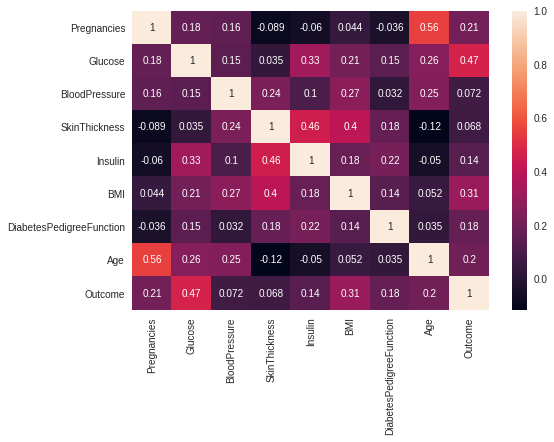

In [41]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [42]:
# data normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(460, 8) (460, 1) (116, 8) (116, 1)


In [44]:
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)
Y_train=Y_train.reshape((Y_train.shape[0],))
Y_test=Y_test.reshape((Y_test.shape[0],))
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(460, 8) (460,) (116, 8) (116,)


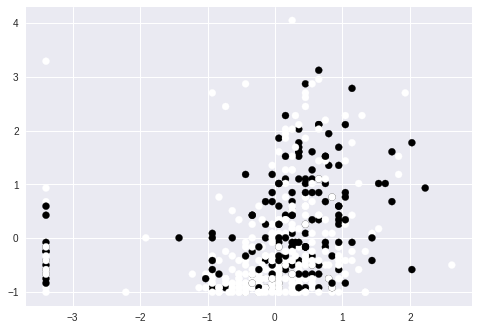

In [46]:
# data visualisation:
plt.style.use('seaborn')
plt.scatter(X_train[:,2],X_train[:,7],c=Y_train)

In [70]:
# applying a knn algorithm:
def distance(x1,x2):
  # return euclidian distance
  return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,query_point,k):
  val=[]
  for i in range(X.shape[0]):
    d=distance(query_point,X[i])
    val.append((d,Y[i]))
  val=sorted(val)
  val=val[:k]
  val=np.asarray(val)
  #print(val)
  #print(val[:,1])
  new_val=np.unique(val[:,1],return_counts=True)
  #print(new_val)
  index=np.argmax(new_val[1])
  #print(index)
  pred=new_val[0][index]
  return pred
  #print(pred)
  #print(new_val)

In [75]:
print("Actual : {} ".format(Y_test[50]))
print('Prediction is {} '.format(knn(X_train,Y_train,X_test[50],5)))
#print(Y_test[10])

Actual : 1 
Prediction is 1.0 


In [103]:
from sklearn.metrics import accuracy_score

In [104]:
# lets find out accuracy :
def compute_Predictions(k):
  predictions=[]
  for i in range(X_test.shape[0]):
    predictions.append(knn(X_train,Y_train,X_test[i],k))
  return accuracy_score(Y_test,predictions)

In [105]:
acc_score=[]
for i in range(1,51):
  acc_score.append(compute_Predictions(i))
print(np.argmax(acc_score))

14


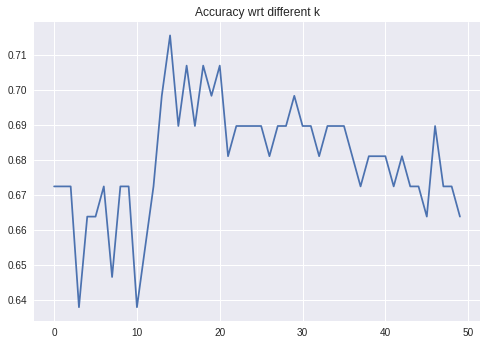

In [114]:
plt.plot(acc_score)
plt.title('Accuracy wrt different k')
plt.show()

In [106]:
# highest_accuracy of knn
print(acc_score[14])

0.7155172413793104


In [111]:
# lets take k=root(n) where n is the number of training_samples:
best_k=int(np.round(np.sqrt(X_train.shape[0])))
print(best_k)
print(compute_Predictions(best_k))

21
0.7068965517241379


In [112]:
from sklearn.neighbors import  KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)

0.6637931034482759

In [113]:
classifier.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [115]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([375, 201]))